## Summary

This notebook is used to generate various overview plots of the autism phenotype dataset.
* Pie chart of response (0, 1, 2, 3, ...) distribution
* Pie charts of clinical diagnosis, ADIR diagnosis, ADOS diagnosis, and SRS diagnosis
* Pie charts showing clinical diagnosis for males and females separately
* Counts for instrument venn diagram (image generated using eulerAPE http://www.eulerdiagrams.org/eulerAPE/)
* Pie chart of datasets
* Pie chart of sex
* Bar chart of age
* Bar chart of missing data per feature
* Listing of item types for ADIR
* Listing of item types for ADOS
* Listing of item types for SRS



## Load Data

In [6]:
import json
import csv
import numpy as np

with open("../preprocessing/AutismPhenotype.json") as schema_file:    
    pheno_schema = json.load(schema_file)
    
with open("../data/all_samples_filtered.csv") as f:
    reader = csv.reader(f)
    header = next(reader)[1:]
    sample_names, data = zip(*[(x[0], x[1:]) for x in reader])
    
data = np.asarray(data)
print(data.shape)

with open("../data/all_samples_filtered_labels.csv") as f:
    reader = csv.reader(f)
    label_header = next(reader)[1:]
    _, labels = zip(*[(x[0], x[1:]) for x in reader])
    
with open("../data/all_samples.csv") as f:
    reader = csv.reader(f)
    all_info_header = next(reader)
    all_info = list(reader)

(16291, 250)


In [7]:
# Check that there are no empty rows
no_data = [i for i, x in enumerate(data) if sum([1 if y not in [None, 'None', ''] else 0 for y in x])==0]
print(len(no_data))
print(no_data)

0
[]


## Responses

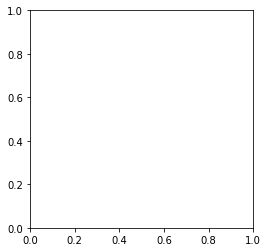

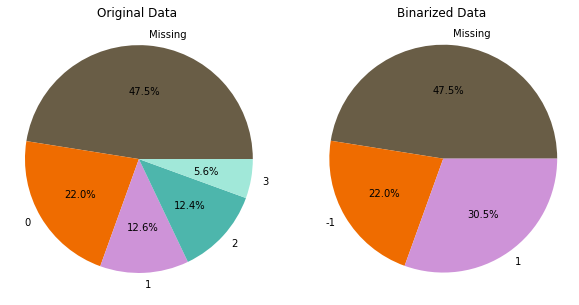

In [8]:
import matplotlib.pyplot as plt
unique, counts = np.unique(data, return_counts=True)
counts[3] += counts[4]
unique = ["Missing", "0", "1", "2", "3"]
counts = [counts[5], counts[0], counts[1], counts[2], counts[3]]
colors = ["#695d46", "#ef6c00", "#ce93d8", "#4db6ac", "#a1e8d9"]
dict(zip(unique, counts/sum(counts)))

fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.pie(counts/sum(counts), labels=unique, autopct='%1.1f%%', colors=colors)
ax1.set_title('Original Data')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

unique = ["Missing", "-1", "1"]
counts = [counts[0], counts[1], counts[2]+counts[3]+counts[4]]
ax2.pie(counts/sum(counts), labels=unique, autopct='%1.1f%%', colors=colors)
ax2.set_title('Binarized Data')
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


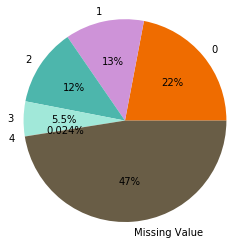

In [9]:
import matplotlib.pyplot as plt
unique, counts = np.unique(data, return_counts=True)
unique = list(unique)
unique[unique.index('None')] = 'Missing Value'
colors = ["#ef6c00", "#ce93d8", "#4db6ac", "#a1e8d9", "#b3a77d", "#695d46"]
dict(zip(unique, counts/sum(counts)))

fig1, (ax1) = plt.subplots(1, 1, figsize=(4, 4))
ax1.pie(counts/sum(counts), labels=unique, autopct='%.2g%%', colors=colors)
#ax1.set_title('Response Distribution')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


## Diagnosis

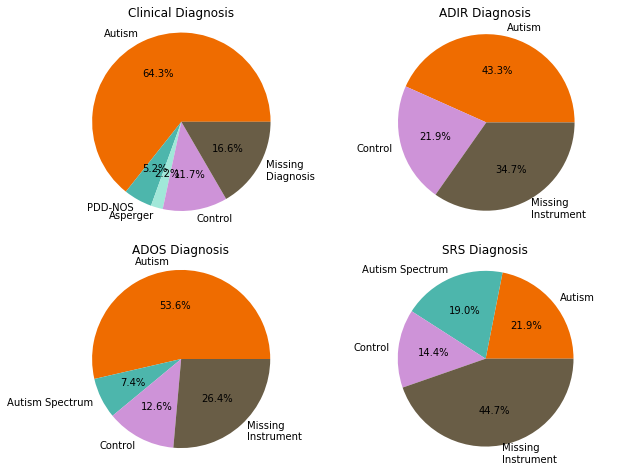

In [10]:
import matplotlib.pyplot as plt
from collections import Counter

adir_c = Counter([x[1] for x in labels])
ados_c = Counter([x[6] for x in labels])
srs_c = Counter([x[11] for x in labels])
clin_c = Counter([x[1] for x in all_info])

clin_keys = ['Autism', 'PDD-NOS', 'Asperger', 'Control', 'None']
clin_colors = ["#ef6c00", "#4db6ac", "#a1e8d9", "#ce93d8", "#695d46"]
adir_keys = ['Autism', 'Control', 'None']
adir_colors = ["#ef6c00", "#ce93d8", "#695d46"]
keys = ['Autism', 'Autism Spectrum', 'Control', 'None']
other_colors = ["#ef6c00", "#4db6ac", "#ce93d8", "#695d46"]

fig1, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))

ax1.pie([clin_c[k] for k in clin_keys], labels=[k if k != 'None' else 'Missing\nDiagnosis' for k in clin_keys], autopct='%1.1f%%', colors=clin_colors)
ax1.set_title('Clinical Diagnosis')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax2.pie([adir_c[k] for k in adir_keys], labels=[k if k != 'None' else 'Missing\nInstrument' for k in adir_keys], autopct='%1.1f%%', colors=adir_colors)
ax2.set_title('ADIR Diagnosis')
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax3.pie([ados_c[k] for k in keys], labels=[k if k != 'None' else 'Missing\nInstrument' for k in keys], autopct='%1.1f%%', colors=other_colors)
ax3.set_title('ADOS Diagnosis')
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax4.pie([srs_c[k] for k in keys], labels=[k if k != 'None' else 'Missing\nInstrument' for k in keys], autopct='%1.1f%%', colors=other_colors)
ax4.set_title('SRS Diagnosis')
ax4.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


//anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


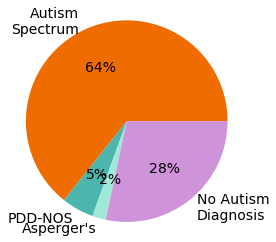

In [11]:
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter

clin_c = Counter([x[1] for x in all_info])

clin_keys = ['Autism', 'PDD-NOS', 'Asperger', 'Control']
clin_labels = ['Autism\nSpectrum', 'PDD-NOS', "Asperger's", 'No Autism\nDiagnosis']
clin_colors = ["#ef6c00", "#4db6ac", "#a1e8d9", "#ce93d8", "#695d46"]

fig1, ((ax1)) = plt.subplots(1, 1, figsize=(4, 4))

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)

ax1.pie([clin_c['None']+clin_c[k] if k == 'Control' else clin_c[k] for k in clin_keys], labels=clin_labels, autopct='%1.f%%', colors=clin_colors)
#ax1.set_title('Clinical Diagnosis')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


//anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


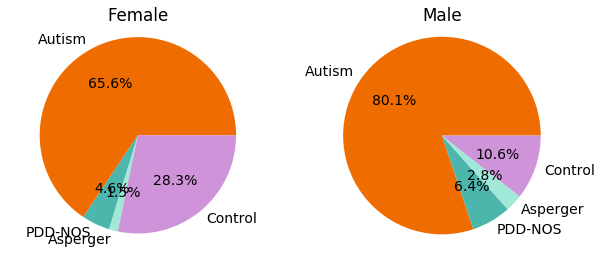

In [12]:
gender_diag_c = Counter([(x[1], x[9]) for x in all_info])

fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.pie([gender_diag_c[(k, 'Female')] for k in clin_keys], labels=[k if k != 'None' else 'Missing\nDiagnosis' for k in clin_keys], autopct='%1.1f%%', colors=clin_colors)
ax1.set_title('Female')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax2.pie([gender_diag_c[(k, 'Male')] for k in clin_keys], labels=[k if k != 'None' else 'Missing\nDiagnosis' for k in clin_keys], autopct='%1.1f%%', colors=clin_colors)
ax2.set_title('Male')
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Instrument

In [13]:
# Instrument overlap
adir_indices = list(range(0, 139))
ados_indices = list(range(139, 185))
srs_indices = list(range(185, 250))

c = Counter([(sum([1 if y not in [None, 'None', ''] else 0 for y in x[adir_indices]])>0,
              sum([1 if y not in [None, 'None', ''] else 0 for y in x[ados_indices]])>0,
              sum([1 if y not in [None, 'None', ''] else 0 for y in x[srs_indices]])>0)
            for x in data])

print(c[(True, False, False)])
print(c[False, True, False])
print(c[False, False, True])

print(c[(True, True, False)])
print(c[(True, False, True)])
print(c[(False, True, True)])

print(c[(True, True, True)])

1203
2173
2713
3625
385
775
5417


## Dataset

//anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


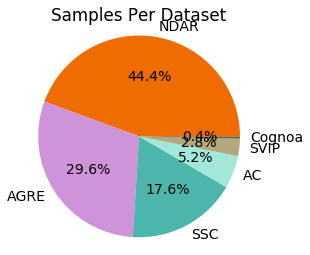

Counter({'National Database for Autism Research': 7231, 'AGRE': 4824, 'Simons Simplex Collection': 2872, 'Autism Consortium': 851, 'SVIP': 454, 'Cognoa': 59})


In [14]:
dataset_c = Counter([x[5] for x in all_info])
keys = list([k for k, v in dataset_c.most_common()])

abbrev = {'Autism Consortium': 'AC', 'Simons Simplex Collection': 'SSC', 'AGRE': 'AGRE', 'National Database for Autism Research': 'NDAR', 'Cognoa': 'Cognoa', 'SVIP': 'SVIP'}
fig1, (ax1) = plt.subplots(1, 1, figsize=(4, 4))
ax1.pie([dataset_c[k] for k in keys], labels=[abbrev[k] for k in keys], autopct='%1.1f%%', colors=colors)
ax1.set_title('Samples Per Dataset')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

print(dataset_c)


In [27]:
print(len([x for x in all_info if x[5] == 'SSC']))
print(sum(is_ssc))

0
0


In [34]:
# dataset + instrument

has_adir = [sum([1 if y not in [None, 'None', ''] else 0 for y in x[adir_indices]])>0 for x in data]
has_ados = [sum([1 if y not in [None, 'None', ''] else 0 for y in x[ados_indices]])>0 for x in data]
has_srs = [sum([1 if y not in [None, 'None', ''] else 0 for y in x[srs_indices]])>0 for x in data]
is_agre = [x[5]=='AGRE' for x in all_info]
is_ssc = [x[5]=='Simons Simplex Collection' for x in all_info]

print('AGRE & ADIR', sum([x and y for x, y in zip(has_adir, is_agre)]))
print('AGRE & ADOS', sum([x and y for x, y in zip(has_ados, is_agre)]))
print('AGRE & SRS', sum([x and y for x, y in zip(has_srs, is_agre)]))

print('SSC & ADIR', sum([x and y for x, y in zip(has_adir, is_ssc)]))
print('SSC & ADOS', sum([x and y for x, y in zip(has_ados, is_ssc)]))
print('SSC & SRS', sum([x and y for x, y in zip(has_srs, is_ssc)]))

family_index = all_info_header.index('family')
print('SSC families', len(set([x[family_index] for x in all_info if x[5] == 'Simons Simplex Collection'])))
print('AGRE families', len(set([x[family_index] for x in all_info if x[5] == 'AGRE'])))
print('AGRE individuals', len([x for x in all_info if x[5] == 'AGRE']))

      

AGRE & ADIR 3769
AGRE & ADOS 3076
AGRE & SRS 2899
SSC & ADIR 2870
SSC & ADOS 2869
SSC & SRS 2860
SSC families 2856
AGRE families 2043
AGRE individuals 4824


## Sex

//anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


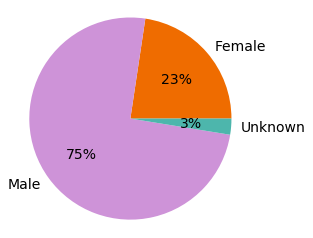

In [27]:
gender_c = Counter([x[9] for x in all_info])
keys = list(gender_c.keys())



fig1, (ax1) = plt.subplots(1, 1, figsize=(4, 4))
ax1.pie([gender_c[k] for k in keys], labels=[k if k != 'None' else 'Unknown' for k in keys], autopct='%1.f%%', colors=colors)
#ax1.set_title('Sex Distribution')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


## Age

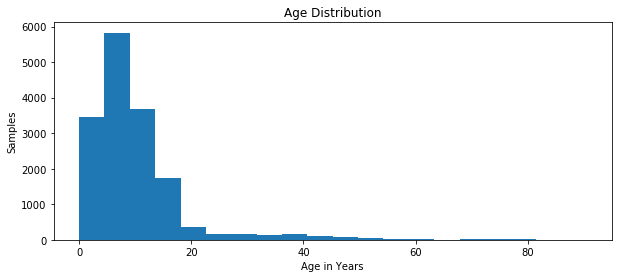

In [10]:
ages = [1.0*int(x[0])/12 for x in all_info if x[0] not in ['None', '']]
fig1, (ax1) = plt.subplots(1, 1, figsize=(10, 4))
ax1.hist(ages, bins=20)
ax1.set_title('Age Distribution')
ax1.set_xlabel('Age in Years')
ax1.set_ylabel('Samples')

plt.show()


## Missing Data

//anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


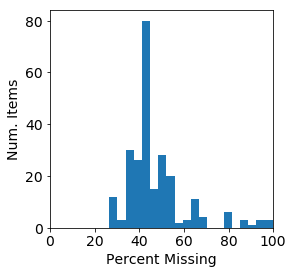

In [22]:
perc_missing = 100*np.sum(data=='None', axis=0)/np.shape(data)[0]
fig1, (ax1) = plt.subplots(1, 1, figsize=(4, 4))
ax1.hist(perc_missing, bins=20)
ax1.set_xlabel('Percent Missing')
ax1.set_ylabel('Num. Items')
plt.xlim([0,100])
plt.show()

//anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


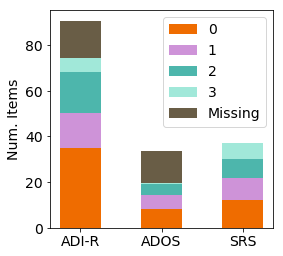

ADIR missing percent 0.822173568765
ADOS missing percent 0.583127243718
SRS missing percent 0.997423201126


In [19]:
import numpy as np
from collections import defaultdict

m, n = data.shape
has_adir = [sum([1 if y not in [None, 'None', ''] else 0 for y in x[adir_indices]])>0 for x in data]
has_ados = [sum([1 if y not in [None, 'None', ''] else 0 for y in x[ados_indices]])>0 for x in data]
has_srs = [sum([1 if y not in [None, 'None', ''] else 0 for y in x[srs_indices]])>0 for x in data]

adir_data = data[has_adir, :][:, adir_indices]
ados_data = data[has_ados, :][:, ados_indices]
srs_data = data[has_srs, :][:, srs_indices]

unique, counts = np.unique(adir_data, return_counts=True)
adir_responses = defaultdict(int, zip(unique, counts))
unique, counts = np.unique(ados_data, return_counts=True)
ados_responses = defaultdict(int, zip(unique, counts))
unique, counts = np.unique(srs_data, return_counts=True)
srs_responses = defaultdict(int, zip(unique, counts))

ind = [0, 1, 2]
width = 0.5

r0 = [adir_responses['0']/m, ados_responses['0']/m, srs_responses['0']/m]
r1 = [adir_responses['1']/m, ados_responses['1']/m, srs_responses['1']/m]
r2 = [adir_responses['2']/m, ados_responses['2']/m, srs_responses['2']/m]
r3 = [adir_responses['3']/m, ados_responses['3']/m, srs_responses['3']/m]
r4 = [adir_responses['4']/m, ados_responses['4']/m, srs_responses['4']/m]
missing = [adir_responses['None']/m, ados_responses['None']/m, srs_responses['None']/m]

plt.figure(figsize=(4, 4))
plt.bar(ind, r0, width, color=colors[0], label='0')
plt.bar(ind, r1, width, bottom=r0, color=colors[1], label='1')
plt.bar(ind, r2, width, bottom=[sum(x) for x in zip(r0, r1)], color=colors[2], label='2')
plt.bar(ind, r3, width, bottom=[sum(x) for x in zip(r0, r1, r2)], color=colors[3], label='3')
#plt.bar(ind, r4, width, bottom=[sum(x) for x in zip(r0, r1, r2, r3)], color=colors[4], label='4')
plt.bar(ind, missing, width, bottom=[sum(x) for x in zip(r0, r1, r2, r3, r4)], color=colors[5], label='Missing')
plt.ylabel('Num. Items')

plt.xticks(ind, ('ADI-R', 'ADOS', 'SRS'))
plt.legend(loc='upper right')
plt.show()

print('ADIR missing percent', np.sum(adir_data != 'None')/(sum(has_adir)*len(adir_indices)))
print('ADOS missing percent', np.sum(ados_data != 'None')/(sum(has_ados)*len(ados_indices)))
print('SRS missing percent', np.sum(srs_data != 'None')/(sum(has_srs)*len(srs_indices)))


In [13]:
print(np.sum(data == 'None'))
entry_level_missing = int(sum(missing)*m)

adir_indices = list(range(0, 139))
ados_indices = list(range(139, 185))
srs_indices = list(range(185, 250))

c = Counter([(sum([1 if y not in [None, 'None', ''] else 0 for y in x[adir_indices]])>0,
              sum([1 if y not in [None, 'None', ''] else 0 for y in x[ados_indices]])>0,
              sum([1 if y not in [None, 'None', ''] else 0 for y in x[srs_indices]])>0)
            for x in data])
instrument_level_missing = c[True, False, False]*(len(ados_indices)+len(srs_indices)) + \
     c[False, True, False]*(len(adir_indices)+len(srs_indices)) + \
      c[False, False, True]*(len(adir_indices)+len(ados_indices)) + \
      c[True, True, False]*len(srs_indices) + \
      c[False, True, True]*len(adir_indices) + \
      c[True, False, True]*len(ados_indices)
    
print(entry_level_missing, instrument_level_missing, entry_level_missing+instrument_level_missing)
print(entry_level_missing/np.sum(data == 'None'), instrument_level_missing/np.sum(data == 'None'))

1934019
494228 1439790 1934018
0.25554454222 0.744454940722


## Types of ADIR questions

In [15]:
from collections import defaultdict

datatype_to_q = defaultdict(set)

for key, value in pheno_schema['definitions']['ADIR']['properties'].items():
    if 'data-type' in value:
        if key.endswith('a'):
            datatype_to_q['categorical a'].add(key[:-1])
        elif '.' in key:
            datatype_to_q['ordinal double'].add(key.split('.')[0])
        else:
            datatype_to_q[value['data-type']].add(key)
        
for key, value in datatype_to_q.items():
    print(key, len(value), value, sep='\t')


score	16	{'social_interaction', 'restricted_repetitive_behavior', 'C1', 'A2', 'A1', 'communication', 'B3', 'C3', 'B1', 'B4', 'B2', 'C4', 'A4', 'C2', 'A3', 'abnormality_evident_before_3_years'}
interval	14	{'Q05', 'Q07', 'Q04', 'Q08', 'Q17', 'Q28', 'Q87', 'Q10', 'Q26', 'Q86', 'Q19', 'Q06', 'Q02', 'Q09'}
categorical a	145	{'Q16', 'Q44.2', 'Q83.1', 'Q46.1', 'Q79.2', 'Q17', 'Q55.2', 'Q10', 'Q52.1', 'Q51.1', 'Q58.1', 'Q68.2', 'Q64.1', 'Q34.2', 'Q85.2', 'Q60.1', 'Q32.2', 'Q33.1', 'Q45.1', 'Q71.1', 'Q62.2', 'Q81.1', 'Q40.2', 'Q84.2', 'Q42.1', 'Q48.2', 'Q90.2', 'Q62.1', 'Q67.2', 'Q54.1', 'Q47.1', 'Q69.1', 'Q49.2', 'Q61.2', 'Q47.2', 'Q69.2', 'Q39.1', 'Q56.2', 'Q09', 'Q05', 'Q74.2', 'Q63.1', 'Q08', 'Q43.1', 'Q53.2', 'Q57.1', 'Q66.1', 'Q41.2', 'Q84.1', 'Q78.1', 'Q67.1', 'Q63.2', 'Q36.1', 'Q85.1', 'Q91.2', 'Q06', 'Q71.2', 'Q73.2', 'Q44.1', 'Q70.2', 'Q92.1', 'Q68.1', 'Q61.1', 'Q88.2', 'Q37.2', 'Q29.2', 'Q33.2', 'Q26', 'Q54.2', 'Q76.2', 'Q60.2', 'Q13', 'Q90.1', 'Q86', 'Q19', 'Q50.1', 'Q35.2', 'Q59.1

## Types of ADOS questions

In [16]:
from collections import defaultdict

datatype_to_q = defaultdict(set)

for key, value in pheno_schema['definitions']['ADOS']['properties'].items():
    if 'data-type' in value:
        if key.endswith('a'):
            datatype_to_q['categorical a'].add(key[:-1])
        elif '.' in key:
            datatype_to_q['ordinal double'].add(key.split('.')[0])
        else:
            datatype_to_q[value['data-type']].add(key)
        
for key, value in datatype_to_q.items():
    print(key, len(value), value, sep='\t')


score	3	{'social_interaction', 'restricted_repetitive_behavior', 'communication'}
ordinal	46	{'QB17', 'QA03', 'QB05', 'QD03', 'QB02', 'QA01', 'QB09', 'QB12', 'QA06', 'QD01', 'QB06', 'QA10', 'QB18', 'QB08', 'QC02', 'QA09', 'QB23', 'QB13', 'QB03', 'QC01', 'QB07', 'QA04', 'QA05', 'QA13', 'QD04', 'QB04', 'QB16', 'QA08', 'QA12', 'QE01', 'QA07', 'QB10', 'QB01', 'QB19', 'QA11', 'QB14', 'QB22', 'QB15', 'QB21', 'QD05', 'QA02', 'QE03', 'QB20', 'QB11', 'QE02', 'QD02'}


In [17]:
feature_mapping = {
	'ADOS_Module1': {
		"QA01": "QA01", "QA02": "QA11", "QA03": "QA02", "QA04": "QA03", "QA05": "QA04", 
		"QA06": "QA12", "QA07": "QA07", "QA08": "QA10",
		"QB01": "QB01", "QB02": "QB17", "QB03": "QB02", "QB04": "QB16", "QB05": "QB04",
		"QB06": "QB07", "QB07": "QB19", "QB08": "QB21", "QB09": "QB08", "QB10": "QB10", 
		"QB11": "QB09", "QB12": "QB13", "QB13.1": "QB11", "QB13.2": "QB23", "QB14": "QB14", "QB15": "QB22",
		"QB16": "QB15",
		"QC01": "QC01", "QC02": "QC02",
		"QD01": "QD01", "QD02": "QD02", "QD03": "QD03", "QD04": "QD04",
		"QE01": "QE01", "QE02": "QE02", "QE03": "QE03"
	},
	'ADOS_Module2': {
		"QA01": "QA01", "QA02": "QA02", "QA03": "QA03", "QA04": "QA04", "QA05": "QA09",
		"QA06": "QA07", "QA07": "QA10",
		"QB01": "QB01", "QB02": "QB02", "QB03": "QB04", "QB04": "QB07", "QB05": "QB08",
		"QB06": "QB10", "QB07": "QB09", "QB08": "QB13", "QB09.1": "QB11", "QB09.2": "QB23", "QB10": "QB14",
		"QB11": "QB12", "QB12": "QB15", 
		"QC01": "QC01", "QC02": "QC02",
		"QD01": "QD01", "QD02": "QD02", "QD03": "QD03", "QD04": "QD04",
		"QE01": "QE01", "QE02": "QE02", "QE03": "QE03"
	},
	'ADOS_Module3': {
		"QA01": "QA01", "QA02": "QA02", "QA03": "QA03", "QA04": "QA04", "QA05": "QA05", 
		"QA06": "QA06", "QA07": "QA08", "QA08": "QA09", "QA09": "QA10",
		"QB01": "QB01", "QB02": "QB02", "QB03": "QB03", "QB04": "QB04", "QB05": "QB05",
		"QB06": "QB06", "QB07": "QB13", "QB08": "QB11", "QB09": "QB14", "QB10": "QB12",
		"QB11": "QB15",
		"QC01": "QC02",
		"QD01": "QD01", "QD02": "QD02", "QD03": "QD03", "QD04": "QD04", "QD05": "QD05",
		"QE01": "QE01", "QE02": "QE02", "QE03": "QE03"

	},
	'ADOS_Module4': {
		"QA01": "QA01", "QA02": "QA02", "QA03": "QA03", "QA04": "QA04", "QA05": "QA05", 
		"QA06": "QA06", "QA07": "QA08", "QA08": "QA09", "QA09": "QA10", "QA10": "QA13",
		"QB01": "QB01", "QB02": "QB02", "QB03": "QB03", "QB04": "QB04", "QB05": "QB18",
		"QB06": "QB05", "QB07": "QB06", "QB08": "QB20", "QB09": "QB13", "QB10": "QB11",
		"QB11": "QB14", "QB12": "QB12", "QB13": "QB15",
		"QC01": "QC02",
		"QD01": "QD01", "QD02": "QD02", "QD03": "QD03", "QD04": "QD04", "QD05": "QD05",
		"QE01": "QE01", "QE02": "QE02", "QE03": "QE03"
	}
}

agg_mod_to_mods = defaultdict(dict)

for module in feature_mapping.keys():
    for key, value in feature_mapping[module].items():
        agg_mod_to_mods[value][module] = key

for key in sorted(agg_mod_to_mods.keys()):
    values = agg_mod_to_mods[key]
    print(key, '' if 'ADOS_Module1' not in values else values['ADOS_Module1'],
         '' if 'ADOS_Module2' not in values else values['ADOS_Module2'],
         '' if 'ADOS_Module3' not in values else values['ADOS_Module3'],
         ('' if 'ADOS_Module4' not in values else values['ADOS_Module4']) + '\\\\', sep=' & ')


QA01 & QA01 & QA01 & QA01 & QA01\\
QA02 & QA03 & QA02 & QA02 & QA02\\
QA03 & QA04 & QA03 & QA03 & QA03\\
QA04 & QA05 & QA04 & QA04 & QA04\\
QA05 &  &  & QA05 & QA05\\
QA06 &  &  & QA06 & QA06\\
QA07 & QA07 & QA06 &  & \\
QA08 &  &  & QA07 & QA07\\
QA09 &  & QA05 & QA08 & QA08\\
QA10 & QA08 & QA07 & QA09 & QA09\\
QA11 & QA02 &  &  & \\
QA12 & QA06 &  &  & \\
QA13 &  &  &  & QA10\\
QB01 & QB01 & QB01 & QB01 & QB01\\
QB02 & QB03 & QB02 & QB02 & QB02\\
QB03 &  &  & QB03 & QB03\\
QB04 & QB05 & QB03 & QB04 & QB04\\
QB05 &  &  & QB05 & QB06\\
QB06 &  &  & QB06 & QB07\\
QB07 & QB06 & QB04 &  & \\
QB08 & QB09 & QB05 &  & \\
QB09 & QB11 & QB07 &  & \\
QB10 & QB10 & QB06 &  & \\
QB11 & QB13.1 & QB09.1 & QB08 & QB10\\
QB12 &  & QB11 & QB10 & QB12\\
QB13 & QB12 & QB08 & QB07 & QB09\\
QB14 & QB14 & QB10 & QB09 & QB11\\
QB15 & QB16 & QB12 & QB11 & QB13\\
QB16 & QB04 &  &  & \\
QB17 & QB02 &  &  & \\
QB18 &  &  &  & QB05\\
QB19 & QB07 &  &  & \\
QB20 &  &  &  & QB08\\
QB21 & QB08 &  &  & \\
QB22 & QB1

## Types of SRS questions

In [18]:
from collections import defaultdict

datatype_to_q = defaultdict(set)

for key, value in pheno_schema['definitions']['SRS']['properties'].items():
    if 'data-type' in value:
        if key.endswith('a'):
            datatype_to_q['categorical a'].add(key[:-1])
        elif '.' in key:
            datatype_to_q['ordinal double'].add(key.split('.')[0])
        else:
            datatype_to_q[value['data-type']].add(key)
        
for key, value in datatype_to_q.items():
    print(key, len(value), value, sep='\t')


score	7	{'social_communication', 'social_awareness', 'autistic_mannerisms', 'social_cognition', 'social_motivation', 'total_t_score', 'total_raw_score'}
ordinal	65	{'Q01', 'Q05', 'Q16', 'Q07', 'Q59', 'Q08', 'Q17', 'Q28', 'Q10', 'Q40', 'Q56', 'Q57', 'Q03', 'Q12', 'Q64', 'Q36', 'Q25', 'Q47', 'Q39', 'Q60', 'Q04', 'Q35', 'Q53', 'Q11', 'Q31', 'Q63', 'Q27', 'Q45', 'Q34', 'Q65', 'Q06', 'Q62', 'Q23', 'Q02', 'Q29', 'Q42', 'Q21', 'Q51', 'Q14', 'Q24', 'Q26', 'Q33', 'Q43', 'Q30', 'Q32', 'Q61', 'Q52', 'Q55', 'Q37', 'Q13', 'Q22', 'Q49', 'Q20', 'Q18', 'Q15', 'Q48', 'Q44', 'Q19', 'Q41', 'Q50', 'Q54', 'Q46', 'Q58', 'Q38', 'Q09'}
